# 日経225全銘柄の投資効率を検証
https://qiita.com/MandT500/items/f4aaafa0de824dab92c2
# pandas_datareader -> yfinance

In [38]:
import matplotlib
matplotlib.matplotlib_fname()

import datetime
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import time,sys,os
import joblib
today = datetime.date.today()

prod = '6mo'
dys = 365
dates = '2021-06-27' # 用いるデータの入ったフォルダ

last = today +datetime.timedelta(days=-dys)
last = pd.to_datetime(last)

os.makedirs('./csv/'+str(today),exist_ok = True)

import requests

def send_line_notify(notification_message):
    """
    LINEに通知する
    """
    line_notify_token = 'NFuqiryl8uSLNdzCG4B0S0z9qTql7u8LCBP0aQCiJ90'
    line_notify_api = 'https://notify-api.line.me/api/notify'
    headers = {'Authorization': f'Bearer {line_notify_token}'}
    data = {'message': f'message: {notification_message}'}
    requests.post(line_notify_api, headers = headers, data = data)

In [2]:
"""TOPIX リストの読み込み"""
Core30 = pd.read_csv('../model01_JPX_yfinance/csv/JPX_data/TOPIX_Core30_20210608.csv')
T100 = pd.read_csv('../model01_JPX_yfinance/csv/JPX_data/TOPIX_100_20210618.csv')
T400 = pd.read_csv('../model01_JPX_yfinance/csv/JPX_data/TOPIX_400_20210619.csv')
#S500 = pd.read_csv('../model01_JPX_yfinance/csv/JPX_data/TOPIX_S500_20210618.csv')
S1200 = pd.read_csv('../model01_JPX_yfinance/csv/JPX_data/TOPIX_S1200_20210620.csv')

S500 = pd.read_csv('../model01_JPX_yfinance/csv/JPX_data/TOPIX_S500_with_info_20210620.csv'\
                       ,).drop('日付',axis=1)

data =pd.DataFrame(S500).copy() 
#data = data.iloc[:5]

data['code'] = [str(s)+".T" for s in data.code]
stocks = data['code']

#stocks = [str(s)+".T" for s in data.code]
#stocks.append("^N225")
tickers = yf.Tickers(" ".join(stocks))
stocks

0      1377.T
1      1379.T
2      1417.T
3      1662.T
4      1719.T
        ...  
488    9945.T
489    9946.T
490    9948.T
491    9956.T
492    9997.T
Name: code, Length: 493, dtype: object

# read CSV

In [3]:
closes= pd.read_csv('./csv/'+str(today)+'/ttl_closes_'\
                    +str(len(stocks))+'_'+str(prod)+'.csv',index_col = 0)

In [4]:
# 収益率を計算
df_returns = (closes - closes.shift(1) )/ closes.shift(1)
# 標準偏差，　分散，シャープ・レシオを計算
df_std = pd.DataFrame(df_returns.var(),columns=['Variance'])
df_mean = pd.DataFrame(df_returns.mean(),columns=['Mean'])
df_sharpR = pd.DataFrame(df_returns.mean() / df_returns.std(),
                         columns = ['Sharpe Ratio'])
# 結果を結合
df_result = pd.concat([df_std, df_mean, df_sharpR], axis=1)

# 標準偏差と収益率のグラフを作成
#df_result.plot.scatter(x='Variance',y='Mean')


#df_result.to_csv('./csv/'+str(today)+'/df_result_'\
                  #  +str(len(stocks))+'_ShapeR.csv')

In [5]:
stock_list = pd.DataFrame(data.set_index('code').iloc[:,0].str[:6],columns =['name'])

In [6]:
_df_result = pd.concat([stock_list,df_result],axis=1)
__df_result = _df_result[_df_result['Variance'] <1]

In [47]:
__df_result = __df_result.sort_values('Sharpe Ratio',ascending=False).iloc[:100]
__df_result

,name,Variance,Mean,Sharpe Ratio
code,,,,
6532.T,ベイカレント,0.000954,0.007081,0.229299
4980.T,デクセリアル,0.000507,0.004977,0.221024
9699.T,西尾レントオ,0.000250,0.003432,0.217077
8511.T,日本証券金融,0.000327,0.003832,0.211808
4028.T,石原産業,0.000674,0.005432,0.209233
...,...,...,...,...
3387.T,クリエイト・,0.000871,0.003215,0.108957
3978.T,マクロミル,0.000714,0.002898,0.108434
5930.T,文化シヤッタ,0.000192,0.001480,0.106714


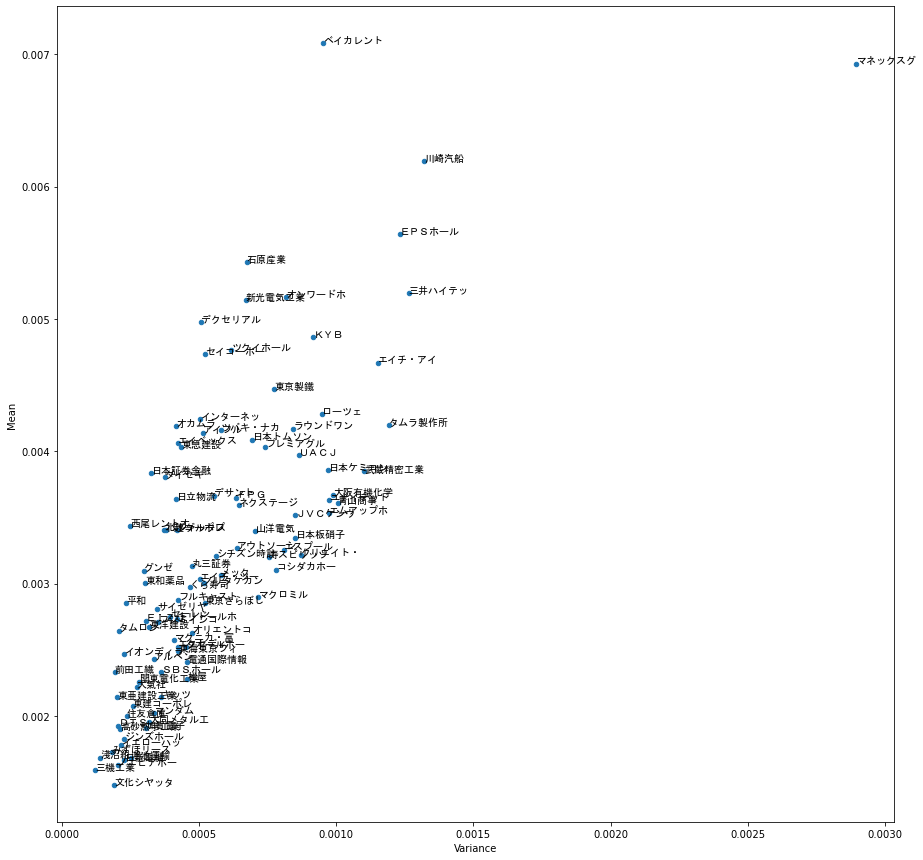

In [51]:


__df_result = __df_result.sort_values('Sharpe Ratio',ascending=False).iloc[:100]
__df_result

